<a href="https://colab.research.google.com/github/shin0105/4YP/blob/master/UCI_dataset_classification_vote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GPyOpt
!pip install GPy

In [2]:
#import packages

#basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Bayesian optimization packages
import GPy
import GPyOpt

#ML Algorithm packages
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import preprocessing

In [3]:
#dataset = UCI Car Evaluation
with open("house-votes-84.names") as f:
    print(f.read())

1. Title: 1984 United States Congressional Voting Records Database

2. Source Information:
    (a) Source:  Congressional Quarterly Almanac, 98th Congress, 
                 2nd session 1984, Volume XL: Congressional Quarterly Inc. 
                 Washington, D.C., 1985.
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987 

3. Past Usage
   - Publications
     1. Schlimmer, J. C. (1987).  Concept acquisition through 
        representational adjustment.  Doctoral dissertation, Department of 
        Information and Computer Science, University of California, Irvine, CA.
        -- Results: about 90%-95% accuracy appears to be STAGGER's asymptote
     - Predicted attribute: party affiliation (2 classes)

4. Relevant Information:
      This data set includes votes for each of the U.S. House of
      Representatives Congressmen on the 16 key votes identified by the
      CQA.  The CQA lists nine different types of votes: voted for, paired
      

In [27]:
names=['class','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution',
       'physician-fee-freeze','el-salvador-aid','religious-groups-in-schools',
       'anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration',
       'synfuels-corporation-cutback','education-spending','superfund-right-to-sue',
       'crime','duty-free-exports','export-administration-act-south-africa']
df = pd.read_csv('house-votes-84.data',names=names)
df.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [28]:
#frequency distribution
for col in names: 
    print(df[col].value_counts())

#replacing ? into NaT
df=df.replace('?',pd.NaT)

#checking missing values
df.isnull().sum()

democrat      267
republican    168
Name: class, dtype: int64
n    236
y    187
?     12
Name: handicapped-infants, dtype: int64
y    195
n    192
?     48
Name: water-project-cost-sharing, dtype: int64
y    253
n    171
?     11
Name: adoption-of-the-budget-resolution, dtype: int64
n    247
y    177
?     11
Name: physician-fee-freeze, dtype: int64
y    212
n    208
?     15
Name: el-salvador-aid, dtype: int64
y    272
n    152
?     11
Name: religious-groups-in-schools, dtype: int64
y    239
n    182
?     14
Name: anti-satellite-test-ban, dtype: int64
y    242
n    178
?     15
Name: aid-to-nicaraguan-contras, dtype: int64
y    207
n    206
?     22
Name: mx-missile, dtype: int64
y    216
n    212
?      7
Name: immigration, dtype: int64
n    264
y    150
?     21
Name: synfuels-corporation-cutback, dtype: int64
n    233
y    171
?     31
Name: education-spending, dtype: int64
y    209
n    201
?     25
Name: superfund-right-to-sue, dtype: int64
y    248
n    170
?     17
Name: crim

class                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [30]:
#dropping rows with missing values
df=df.dropna()
print(df.isnull().sum())

#frequency distribution after removing missing values
for col in names: 
    print(df[col].value_counts())

class                                     0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64
democrat      124
republican    108
Name: class, dtype: int64
n    136
y     96
Name: handicapped-infants, dtype: int64
n    125
y    107
Name: water-project-cost-sharing, dtype: int64
y    123
n    109
Name: adoption-of-the-budget-resolut

In [31]:
#Convert categorical labels to numbers
le = preprocessing.LabelEncoder()

for col in names: 
  df[col] = le.fit_transform(df[col])

df.head()
for col in names: 
    print(df[col].value_counts())

0    124
1    108
Name: class, dtype: int64
0    136
1     96
Name: handicapped-infants, dtype: int64
0    125
1    107
Name: water-project-cost-sharing, dtype: int64
1    123
0    109
Name: adoption-of-the-budget-resolution, dtype: int64
0    119
1    113
Name: physician-fee-freeze, dtype: int64
1    128
0    104
Name: el-salvador-aid, dtype: int64
1    149
0     83
Name: religious-groups-in-schools, dtype: int64
1    124
0    108
Name: anti-satellite-test-ban, dtype: int64
1    119
0    113
Name: aid-to-nicaraguan-contras, dtype: int64
0    119
1    113
Name: mx-missile, dtype: int64
1    128
0    104
Name: immigration, dtype: int64
0    152
1     80
Name: synfuels-corporation-cutback, dtype: int64
0    124
1    108
Name: education-spending, dtype: int64
1    127
0    105
Name: superfund-right-to-sue, dtype: int64
1    149
0     83
Name: crime, dtype: int64
0    146
1     86
Name: duty-free-exports, dtype: int64
1    189
0     43
Name: export-administration-act-south-africa, dtype: i

In [32]:
X = df.drop(['class'], axis=1)
y = df['class']

#splitting train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [33]:
#K-fold validation
def kfold_score(clf,X,y,n_fold):
    X,y = X.values,y.values
    kfold = KFold(n_splits=n_fold, shuffle=True, random_state=1)
    accuracy_list = []

    for train_index, test_index in kfold.split(X, y):
        x_train_fold, x_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        clf.fit(x_train_fold, y_train_fold)
        preds = clf.predict(x_test_fold)
        accuracy_test = accuracy_score(preds,y_test_fold)
        accuracy_list.append(accuracy_test)
    return np.array(accuracy_list).mean()

In [37]:
#Random Forest classification

#max_features: 1 to around sqrt(# of features of dataset)
bounds = [
        {'name': 'max_features', 'type': 'continuous', 'domain': (1, 15)},
        {'name': 'n_estimators', 'type': 'continuous', 'domain': (1, 200)}
      ]

def rf_score(parameters):
  params = {
        'max_features':int(parameters[0][0]),
        'n_estimators':int(parameters[0][1])
    }
  
  clf = RandomForestClassifier(max_features=params['max_features'],n_estimators=params['n_estimators'])
  clf.fit(X_train,y_train)
  score = kfold_score(clf,X_train, y_train,10)
  print(params)
  print(score)
  return score

In [38]:
#RF Classification - Matern52 kernel
kernel = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=rf_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)

{'max_features': 14, 'n_estimators': 26}
0.95625
{'max_features': 8, 'n_estimators': 15}
0.95625
{'max_features': 7, 'n_estimators': 117}
0.9625
{'max_features': 6, 'n_estimators': 109}
0.9625
{'max_features': 12, 'n_estimators': 111}
0.95625
{'max_features': 6, 'n_estimators': 145}
0.9625
{'max_features': 5, 'n_estimators': 197}
0.9625
{'max_features': 3, 'n_estimators': 187}
0.9625
{'max_features': 1, 'n_estimators': 111}
0.9441176470588235
{'max_features': 4, 'n_estimators': 80}
0.95625
{'max_features': 5, 'n_estimators': 130}
0.9625
{'max_features': 3, 'n_estimators': 92}
0.9625
{'max_features': 10, 'n_estimators': 87}
0.95625
{'max_features': 3, 'n_estimators': 106}
0.9625
{'max_features': 6, 'n_estimators': 193}
0.9625
{'max_features': 15, 'n_estimators': 136}
0.95625
{'max_features': 5, 'n_estimators': 76}
0.95625
{'max_features': 6, 'n_estimators': 97}
0.9625
{'max_features': 6, 'n_estimators': 7}
0.96875
{'max_features': 6, 'n_estimators': 131}
0.9625
{'max_features': 6, 'n_es

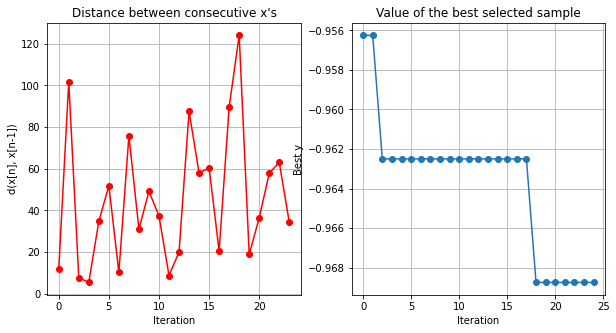

In [39]:
optimizer.plot_convergence()

In [40]:
rf_car = RandomForestClassifier(max_features=6,n_estimators=7)
rf_car.fit(X_train,y_train)
y_pred = rf_car.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.9571428571428572


{'max_features': 4, 'n_estimators': 138}
0.9625
{'max_features': 6, 'n_estimators': 99}
0.95625
{'max_features': 8, 'n_estimators': 89}
0.95625
{'max_features': 2, 'n_estimators': 123}
0.9566176470588236
{'max_features': 7, 'n_estimators': 168}
0.9625
{'max_features': 4, 'n_estimators': 92}
0.9625
{'max_features': 7, 'n_estimators': 71}
0.95625
{'max_features': 7, 'n_estimators': 83}
0.9625
{'max_features': 4, 'n_estimators': 134}
0.9625
{'max_features': 4, 'n_estimators': 81}
0.9625
{'max_features': 5, 'n_estimators': 162}
0.9625
{'max_features': 3, 'n_estimators': 146}
0.9625
{'max_features': 15, 'n_estimators': 12}
0.95625
{'max_features': 3, 'n_estimators': 147}
0.9625
{'max_features': 5, 'n_estimators': 111}
0.95625
{'max_features': 4, 'n_estimators': 114}
0.9625
{'max_features': 11, 'n_estimators': 9}
0.9625
{'max_features': 11, 'n_estimators': 120}
0.95625
{'max_features': 12, 'n_estimators': 8}
0.95
{'max_features': 4, 'n_estimators': 38}
0.9625
{'max_features': 11, 'n_estimato

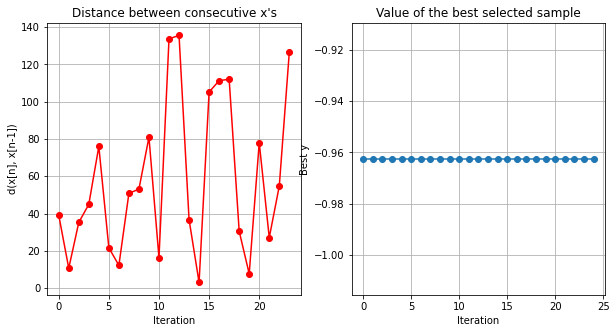

In [42]:
#RF classification - Matern52 + ExpQuad
kernel2 = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0) + GPy.kern.ExpQuad(input_dim=1,variance=1.0,lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=rf_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel2
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)

optimizer.plot_convergence()

In [43]:
rf_car2 = RandomForestClassifier(max_features=4,n_estimators=138)
rf_car2.fit(X_train,y_train)
y_pred = rf_car2.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.9571428571428572


In [44]:
#SVM Classification

bounds = [ {'name': 'C', 'type': 'continuous', 'domain': (0.1, 1)},
        {'name': 'gamma', 'type': 'continuous', 'domain': (0.01, 0.1)}
      ]

def svm_score(parameters):
  params = {
        'C': parameters[0][0],
        'gamma':parameters[0][1]
    }
  
  clf = svm.SVC(C=params['C'],gamma=params['gamma'])
  clf.fit(X_train,y_train)
  score = kfold_score(clf,X_train, y_train,10)
  print(params)
  print(score)
  return score

In [45]:
#SVM Classification - Matern52 kernel
kernel = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=svm_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)

{'C': 0.4771523999478391, 'gamma': 0.010822597221470517}
0.9069852941176471
{'C': 0.3310711741774536, 'gamma': 0.01970377526480962}
0.9069852941176471
{'C': 0.7769459761980834, 'gamma': 0.08308994725975351}
0.9625
{'C': 0.11336012182506214, 'gamma': 0.02042182015832731}
0.8639705882352942
{'C': 0.693167613868772, 'gamma': 0.022842177374479744}
0.9253676470588236
{'C': 0.987778787698171, 'gamma': 0.01366377340941221}
0.9191176470588236
{'C': 0.7957762180776022, 'gamma': 0.09294726762106229}
0.9625
{'C': 0.8623858846803741, 'gamma': 0.012748368455737779}
0.9128676470588235
{'C': 0.7865951586137853, 'gamma': 0.07441288877765347}
0.9625
{'C': 0.5866450372247815, 'gamma': 0.024530984919800644}
0.9253676470588236
{'C': 0.7544399554375519, 'gamma': 0.09676800986441848}
0.9625
{'C': 0.7631385314691378, 'gamma': 0.09822713742963016}
0.9625
{'C': 0.23927052892796552, 'gamma': 0.011741676872633378}
0.8944852941176471
{'C': 0.40282376335690734, 'gamma': 0.09246215157830649}
0.9441176470588235
{'C'

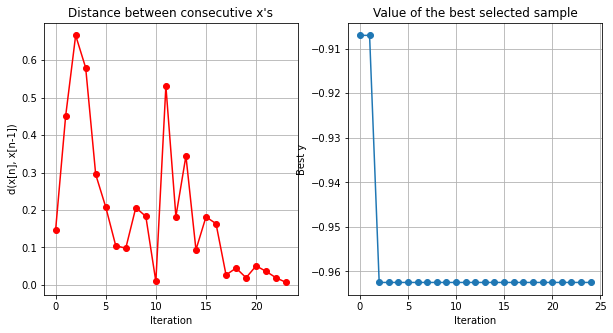

In [46]:
optimizer.plot_convergence()

In [47]:
SVM_car1 = svm.SVC(C=0.777,gamma=0.0831)
SVM_car1.fit(X_train,y_train)
y_pred = SVM_car1.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.9714285714285714


{'C': 0.8251938241031664, 'gamma': 0.08193174964413029}
0.9625
{'C': 0.8036074631031631, 'gamma': 0.07356527907900488}
0.9625
{'C': 0.9049606625209513, 'gamma': 0.018999035539966784}
0.9378676470588235
{'C': 0.24607337235611168, 'gamma': 0.07661568013036844}
0.9253676470588236
{'C': 0.2846593744434045, 'gamma': 0.08669945044242068}
0.9316176470588236
{'C': 0.4301957453230051, 'gamma': 0.020713979014434662}
0.9128676470588235
{'C': 0.6618747237778755, 'gamma': 0.06434467097453028}
0.95
{'C': 0.7313949464796411, 'gamma': 0.0112961653970408}
0.9128676470588235
{'C': 0.8141073203811384, 'gamma': 0.034305288754203675}
0.9441176470588235
{'C': 0.8169625593073472, 'gamma': 0.029678899380438807}
0.9378676470588235
{'C': 0.8138853384564756, 'gamma': 0.07905416866539751}
0.9625
{'C': 0.8122214626379654, 'gamma': 0.014777944352577468}
0.9191176470588236
{'C': 0.8163606279010982, 'gamma': 0.08414705428081785}
0.9625
{'C': 0.8163614772880325, 'gamma': 0.07194919654112772}
0.9625
{'C': 0.80386171900

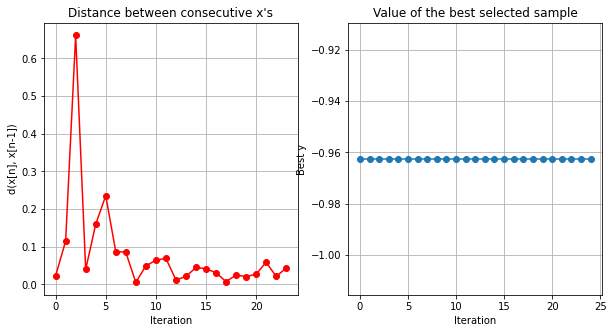

In [48]:
#SVM classification - Matern52 + ExpQuad
kernel2 = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0) + GPy.kern.ExpQuad(input_dim=1,variance=1.0,lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=svm_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel2
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)

optimizer.plot_convergence()

In [49]:
SVM_car2 = svm.SVC(C=0.825,gamma=0.0819)
SVM_car2.fit(X_train,y_train)
y_pred = SVM_car2.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.9714285714285714


In [50]:
#KNN Classification

#search domain
bounds = [ {'name': 'leaf_size', 'type': 'continuous', 'domain': (10, 50)},
        {'name': 'n_neighbors', 'type': 'discrete', 'domain': (3,4,5,6,7)}
      ]

def knn_score(parameters):
  params = {
        'leaf_size': parameters[0][0],
        'n_neighbors':int(parameters[0][1])
    }
  
  clf = KNeighborsClassifier(leaf_size=params['leaf_size'],n_neighbors=params['n_neighbors'])
  clf.fit(X_train,y_train)
  score = kfold_score(clf,X_train, y_train,10)
  print(params)
  print(score)
  return score

{'leaf_size': 23.06360323518668, 'n_neighbors': 5}
0.9132352941176471
{'leaf_size': 29.529422229092162, 'n_neighbors': 3}
0.9132352941176471
{'leaf_size': 24.158964419816154, 'n_neighbors': 3}
0.9132352941176471
{'leaf_size': 33.43197351127887, 'n_neighbors': 4}
0.9194852941176471
{'leaf_size': 34.884802314993735, 'n_neighbors': 6}
0.9194852941176471
{'leaf_size': 34.12080263102519, 'n_neighbors': 7}
0.9132352941176471
{'leaf_size': 34.891383635554355, 'n_neighbors': 3}
0.9132352941176471
{'leaf_size': 32.16550651878727, 'n_neighbors': 6}
0.9194852941176471
{'leaf_size': 34.885043142375714, 'n_neighbors': 3}
0.9132352941176471
{'leaf_size': 32.153166039806, 'n_neighbors': 7}
0.9132352941176471
{'leaf_size': 33.424987080166375, 'n_neighbors': 5}
0.9132352941176471
{'leaf_size': 32.171961592113, 'n_neighbors': 5}
0.9132352941176471
{'leaf_size': 33.46074483955779, 'n_neighbors': 6}
0.9194852941176471
{'leaf_size': 33.451941579709285, 'n_neighbors': 3}
0.9132352941176471
{'leaf_size': 33.

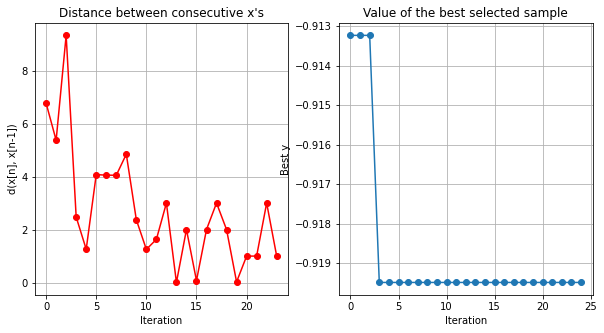

In [51]:
#KNN Classification - Matern52 kernel
kernel = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=knn_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)
optimizer.plot_convergence()

In [52]:
KNN_car1 = KNeighborsClassifier(leaf_size=33,n_neighbors=4)
KNN_car1.fit(X_train,y_train)
y_pred = KNN_car1.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.9571428571428572


{'leaf_size': 28.15264067366154, 'n_neighbors': 3}
0.9132352941176471
{'leaf_size': 35.99325040880946, 'n_neighbors': 6}
0.9194852941176471
{'leaf_size': 43.42340982835191, 'n_neighbors': 7}
0.9132352941176471
{'leaf_size': 20.179254461914834, 'n_neighbors': 4}
0.9194852941176471
{'leaf_size': 29.57591499907709, 'n_neighbors': 5}
0.9132352941176471
{'leaf_size': 17.883265460442512, 'n_neighbors': 6}
0.9194852941176471
{'leaf_size': 12.747606421151112, 'n_neighbors': 3}
0.9132352941176471
{'leaf_size': 18.99411232223906, 'n_neighbors': 5}
0.9132352941176471
{'leaf_size': 20.10926951078249, 'n_neighbors': 6}
0.9194852941176471
{'leaf_size': 17.50910973524231, 'n_neighbors': 5}
0.9132352941176471
{'leaf_size': 18.024654990723977, 'n_neighbors': 3}
0.9132352941176471
{'leaf_size': 17.831453325229557, 'n_neighbors': 7}
0.9132352941176471
{'leaf_size': 20.147941915039247, 'n_neighbors': 3}
0.9132352941176471
{'leaf_size': 20.167169274973126, 'n_neighbors': 6}
0.9194852941176471
{'leaf_size':

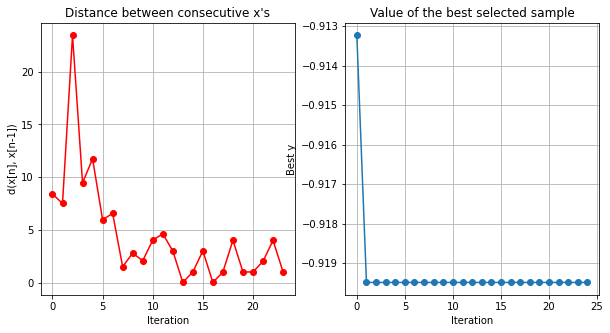

In [53]:
#KNN Classification - Matern52 + ExpQuad
kernel2 = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0) + GPy.kern.ExpQuad(input_dim=1,variance=1.0,lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=knn_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel2
                                                )

optimizer.run_optimization(max_iter=20)

#maximum accuracy score
acc_max=optimizer.fx_opt
#best parameters
params_best=optimizer.x_opt
print(acc_max)
print(params_best)
optimizer.plot_convergence()

In [54]:
KNN_car2 = KNeighborsClassifier(leaf_size=36,n_neighbors=6)
KNN_car2.fit(X_train,y_train)
y_pred = KNN_car2.predict(X_test)
accuracy_test = accuracy_score(y_pred,y_test)
print(accuracy_test)

0.9714285714285714
